# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who - For this dataset, the audience could be any retail ecommerce higher ups that are looking to know more about trends within ecommerce. This can include profit based on category, as well as shipping preferences for different locations or regions. The data itself can answer a lot of questions that the company could have about ecommerce trends.

What - I would need the company to approve tracking and sharing customer data that includes the location of the order as well as the order total and profit. 

How - Using the data gathered, I would create different charts showing off the noticeable trends and then could create machine learning models to help predict profits for ecommerce sales.

# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [3]:
data = pd.read_csv('/workspaces/DX699---HW-Assignments/data.csv', encoding = 'windows-1252')

data.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1/1/2020,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,1/1/2020,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,1/1/2020,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,1/1/2020,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,1/1/2020,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [4]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   str    
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   str    
 3   Ship Mode     3312 non-null   str    
 4   Customer ID   3312 non-null   str    
 5   Segment       3312 non-null   str    
 6   Country       3312 non-null   str    
 7   City          3312 non-null   str    
 8   State         3312 non-null   str    
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   str    
 11  Product ID    3312 non-null   str    
 12  Category      3312 non-null   str    
 13  Sub-Category  3312 non-null   str    
 14  Product Name  3312 non-null   str    
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null   float64
d

In [5]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
std,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342
min,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800


A lot of the columns are string columns, and some of the number columns are still categorical since they aren't measurements, an example is the postal code column

In [6]:
data.isna().any()

Order Date      False
Row ID          False
Order ID        False
Ship Mode       False
Customer ID     False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Product ID      False
Category        False
Sub-Category    False
Product Name    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

There are no null values within this dataset which means we don't have to fill any null values or remove any rows

In [7]:
duplicates = data.duplicated()

np.unique(duplicates)

array([False])

I also have learned there are no duplicate values in this dataset

Columns to drop: Country, Postal Code and Order ID

Need to turn order date into date time and encode some of the categorical ones

In [13]:
print(f'There are a total of {len(data)} values in the dataset.')

for i in data.columns:
    num_un = len(np.unique(data[i]))
    print(f'There are {num_un} values in {i}.')

There are a total of 3312 values in the dataset.
There are 322 values in Order Date.
There are 3312 values in Row ID.
There are 1687 values in Order ID.
There are 4 values in Ship Mode.
There are 693 values in Customer ID.
There are 3 values in Segment.
There are 1 values in Country.
There are 350 values in City.
There are 47 values in State.
There are 437 values in Postal Code.
There are 4 values in Region.
There are 1525 values in Product ID.
There are 3 values in Category.
There are 17 values in Sub-Category.
There are 1511 values in Product Name.
There are 2552 values in Sales.
There are 14 values in Quantity.
There are 12 values in Discount.
There are 2881 values in Profit.


After running this code, I have found that I would also remove the Row ID, Customer ID, and Product Name. These are categorical variables that will not have a lot of effect on the models. Since they are almost all unique, they may lead to overfitting since the model could learn this specific value means a certain profit. 

Furthermore, when it comes to encoding categorical variables, I will have to research all of the different options for encoding categorical variables. If the categories have an order, I will want to find an encoder that will show the hierarchy in the column. However, if they are nominal and do not have a hierarchy, I will most likely use one hot encoding to create individual binary columns for each value of the original feature.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

The chart I am choosing to reproduce is the line graph with two lines for ticket trend

In [40]:
import random

n = 12
receive = random.sample(range(100, 401), n)
subs = random.sample(range(12, 30), n)
process = []

for i in range(len(subs)):
    process.append(receive[i] - subs[i])

data = {'Received' : receive, 'Processed' : process}

df = pd.DataFrame(data, index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

df

,Received,Processed
Jan,100,83
Feb,127,105
Mar,287,258
Apr,278,259
May,350,334
Jun,319,299
Jul,246,231
Aug,124,103
Sep,400,376
Oct,232,218


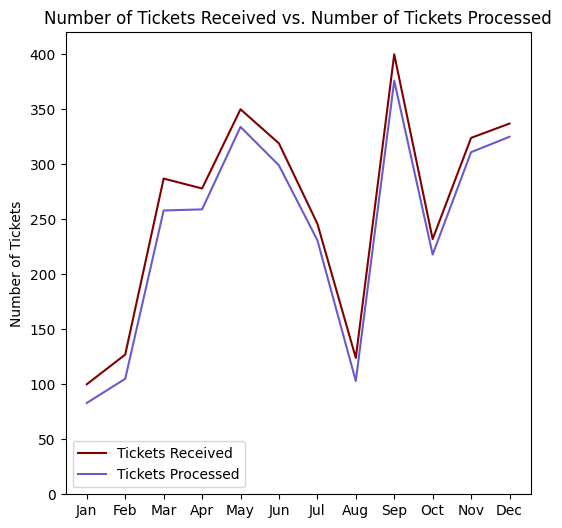

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))

plt.plot(df['Received'], c = 'maroon', label = 'Tickets Received')
plt.plot(df['Processed'], c = 'slateblue', label = 'Tickets Processed')
plt.ylim(0, 420)
plt.ylabel('Number of Tickets')
plt.title('Number of Tickets Received vs. Number of Tickets Processed')
plt.legend(loc = 'lower left')